<a href="https://colab.research.google.com/github/reyhanfisena/Classification-Batik-Jawa-using-CNN/blob/main/Proyek_Klasifikasi_Batik_Jawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library#

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#Connect to Google Drive#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/dataset_batik'
img_height = 200
img_width = 200
batch_size = 32

#Preprocessing Data#

In [ ]:
train_datagen = ImageDataGenerator(
    validation_split=0.3,
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 280 images belonging to 5 classes.
Found 120 images belonging to 5 classes.


#CNN Modelling#

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 97, 97, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,380,837 (12.90 MB)

 Trainable params: 3,380,837 (12.90 MB)

 Non-trainable params: 0 (0.00 B)

#Compile


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7991 - loss: 0.6705 - val_accuracy: 0.8333 - val_loss: 0.4946
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.8681 - loss: 0.4315 - val_accuracy: 0.8583 - val_loss: 0.4042
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8988 - loss: 0.3385 - val_accuracy: 0.8500 - val_loss: 0.3632
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9044 - loss: 0.2770 - val_accuracy: 0.8917 - val_loss: 0.3116
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9260 - loss: 0.2292 - val_accuracy: 0.8833 - val_loss: 0.2823
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9044 - loss: 0.2401 - val_accuracy: 0.8833 - val_loss: 0.3221
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9379 - loss: 0.1679 - val_accuracy: 0.9250 - val_loss: 0.2571
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9427 - loss: 0.1871 - val_accuracy: 0.9167 - val_loss: 0.2867
Epoch 9/

##Visualisasi Akurasi dan Loss


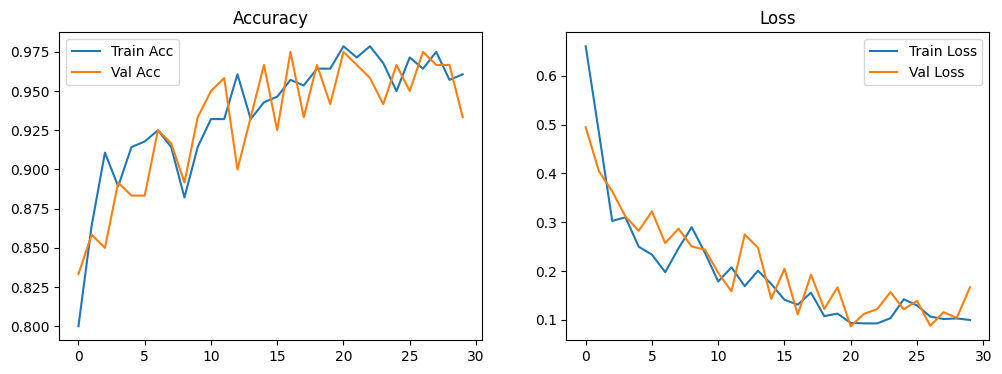

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


##Evaluasi Model


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 717ms/step
              precision    recall  f1-score   support

  Jawa_Barat       1.00      1.00      1.00        24
 Jawa_Tengah       0.96      0.96      0.96        24
  Jawa_Timur       0.96      0.92      0.94        24
      Madura       1.00      0.96      0.98        24
  Yogyakarta       0.92      1.00      0.96        24

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



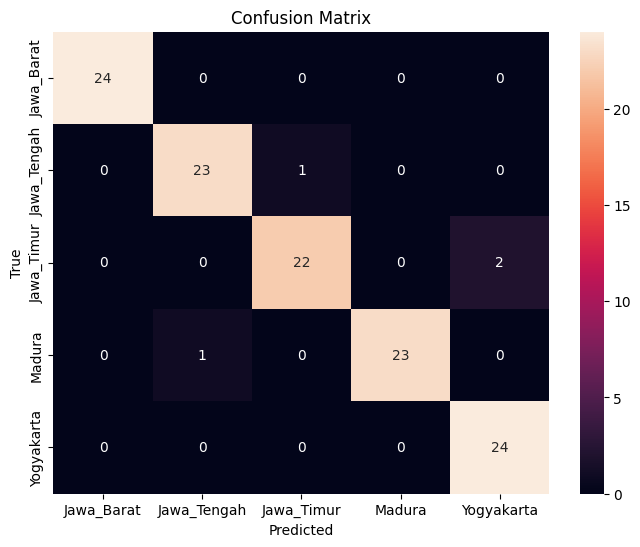

In [ ]:
val_generator.reset()
pred = model.predict(val_generator)
y_pred = np.argmax(pred, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
